In [1]:
!pip install seaborn
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [26]:
PATH = "data.csv"
dataset = pd.read_csv(PATH)
dataset = dataset[(dataset["Year of Release"] >= 1960) & (dataset["Year of Release"] <= 2017)]


In [27]:
dataset.fillna(0, inplace=True)
sum_of_profit_by_year = dataset.groupby("Year of Release")["Gross"].sum()

sum_of_profit_by_year

years = sum_of_profit_by_year.index
gross = sum_of_profit_by_year.values

In [48]:
x = [x for x in range(1, len(dataset['Movie Rating']) + 1)]
rating = dataset['Movie Rating']

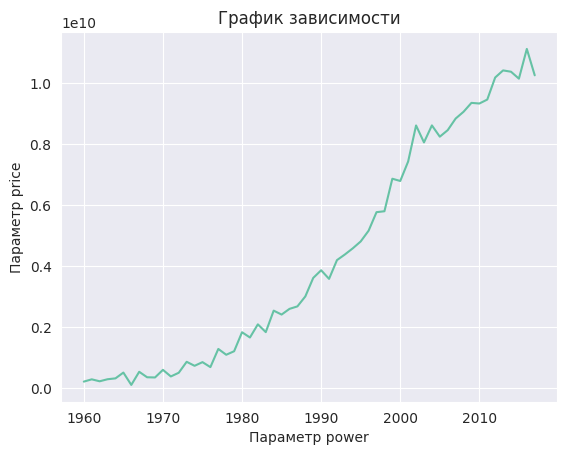

In [28]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(
 x=years,
 y=gross,
)
plt.title('График зависимости')
plt.xlabel('Параметр power')
plt.ylabel('Параметр price')
plt.show()

In [29]:
x = np.array(years).reshape(-1, 1)
y = np.array(gross).reshape(-1, 1)


In [42]:
DEGREES = 2
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 2.6235193753664534e+17


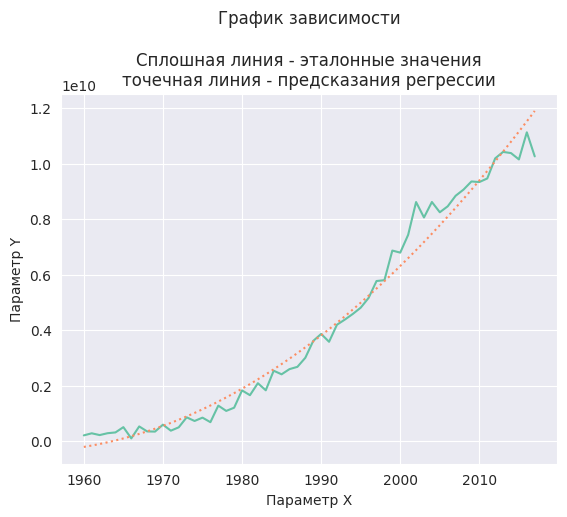

In [43]:
sns.lineplot(
 x=years,
 y=gross,
 linestyle="solid"
)
sns.lineplot(
 x=years,
 y=predictions.reshape(-1),
 linestyle="dotted"
)
plt.title(
 'График зависимости\n\n'
 'Сплошная линия - эталонные значения\n'
 'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [44]:
x_parameters = np.append(
 regression['linearregression'].intercept_[0],
 regression['linearregression'].coef_[0][1:]
)
x_parameters

array([ 1.10619462e+13, -1.13346433e+10,  2.90341281e+06])

In [ ]:
# y=1.10619462e13 - x1.13346433e10 + x^2 * 2.90341281e6
